In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#%%html
#<style>
#.output_wrapper, .output {
#    height:auto !important;
#    max-height:1000px;  /* your desired max-height here */
#}
#.output_scroll {
#    box-shadow:none !important;
#    webkit-box-shadow:none !important;
#}
#</style>

In [3]:
import sys
sys.path.append("..")

In [4]:
from optimus import Optimus
from optimus.profiler.functions import print_json as j

In [5]:
# Create optimus
op = Optimus(master="local[*]", app_name = "optimus" ,verbose =True, checkpoint= True)


                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
Transform and Roll out...
Just checking that all necessary environments vars are present...
-----
HADOOP_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
PYSPARK_PYTHON=python
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
JAVA_HOME=C:\Program Files\Java\jdk1.8.0_181
Pyarrow Installed
-----
Starting or getting SparkSession and SparkContext...
Setting checkpoint folder local. If you are in a cluster initialize Optimus with master='your_ip' as param
Deleting previous folder if exists...
Creating the checkpoint directory...
Optimus successfully imported. Have

In [6]:
df = op.read.csv("Meteorite_Landings.csv", header=True)

In [7]:
df.table()

name (string),id (string),nametype (string),recclass (string),mass (g) (string),fall (string),year (string),reclat (string),reclong (string),GeoLocation (string)
Aachen,1,Valid,L5,21,Fell,01/01/1880⸱12:00:00⸱AM,50.775000,6.083330,"(50.775000,⸱6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⸱12:00:00⸱AM,56.183330,10.233330,"(56.183330,⸱10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⸱12:00:00⸱AM,54.216670,-113.000000,"(54.216670,⸱-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⸱12:00:00⸱AM,16.883330,-99.900000,"(16.883330,⸱-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⸱12:00:00⸱AM,-33.166670,-64.950000,"(-33.166670,⸱-64.950000)"
Adhi⸱Kot,379,Valid,EH4,4239,Fell,01/01/1919⸱12:00:00⸱AM,32.100000,71.800000,"(32.100000,⸱71.800000)"
Adzhi-Bogdo⸱(stone),390,Valid,LL3-6,910,Fell,01/01/1949⸱12:00:00⸱AM,44.833330,95.166670,"(44.833330,⸱95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⸱12:00:00⸱AM,44.216670,0.616670,"(44.216670,⸱0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⸱12:00:00⸱AM,-31.600000,-65.233330,"(-31.600000,⸱-65.233330)"
Aguila⸱Blanca,417,Valid,L,1440,Fell,01/01/1920⸱12:00:00⸱AM,-30.866670,-64.550000,"(-30.866670,⸱-64.550000)"


In [8]:
df.registerTempTable("table")

In [247]:
df.select("name").crossJoin(df.select("name")).show()

+------+-------------------+
|  name|               name|
+------+-------------------+
|Aachen|             Aachen|
|Aachen|             Aarhus|
|Aachen|               Abee|
|Aachen|           Acapulco|
|Aachen|            Achiras|
|Aachen|           Adhi Kot|
|Aachen|Adzhi-Bogdo (stone)|
|Aachen|               Agen|
|Aachen|             Aguada|
|Aachen|      Aguila Blanca|
|Aachen|   Aioun el Atrouss|
|Aachen|                Aïr|
|Aachen|    Aire-sur-la-Lys|
|Aachen|              Akaba|
|Aachen|           Akbarpur|
|Aachen|            Akwanga|
|Aachen|            Akyumak|
|Aachen|            Al Rais|
|Aachen|          Al Zarnkh|
|Aachen|              Alais|
+------+-------------------+
only showing top 20 rows



In [116]:
95/100

95/5
19/20
19/2/2

4.75

In [180]:

columns = ["reclat", "reclong","mass (g)"]
exprs= []
for c in columns:
    c="`"+ c + "`"
    exprs.append("approx_percentile(" + c+ ", array(1/20, 1/4, 1/2, 3/4, 19/20)) AS " + c +" ")

exprs = "SELECT "+ ",".join(exprs) + "FROM table"

df.sql(exprs).table()

reclat (array<double>),reclong (array<double>),mass (g) (array<double>)
"[-84.35432,⸱-76.71424,⸱-71.5,⸱0.0,⸱34.48972]","[-90.35,⸱0.0,⸱35.66667,⸱157.16667,⸱168.0]","[1.1,⸱7.2,⸱32.6,⸱202.5,⸱4000.0]"


In [79]:
import timeit

In [230]:
start_time = timeit.default_timer()
df1 = df.cols.cast("reclat","int")
#df1.table(1)
df1.sql("select reclat, count(reclat) AS count from table group by reclat ORDER BY count desc LIMIT 10").show()
timeit.default_timer() - start_time

AnalysisException: "No handler for UDF/UDAF/UDTF 'org.apache.hadoop.hive.ql.udf.generic.GenericUDAFHistogramNumeric': org.apache.hadoop.hive.ql.exec.UDFArgumentTypeException: Only numeric type arguments are accepted but string was passed as parameter 1.; line 1 pos 15"

In [ ]:
start_time = timeit.default_timer()
df1 = df.cols.cast("reclat","int")
#df1.table(1)
df1.sql("select explode(histogram_numeric(reclat, 10)) from table").show()
timeit.default_timer() - start_time


In [232]:
hists = df.selectExpr("histogram_numeric(reclat, 5)")

AnalysisException: "No handler for UDF/UDAF/UDTF 'org.apache.hadoop.hive.ql.udf.generic.GenericUDAFHistogramNumeric': org.apache.hadoop.hive.ql.exec.UDFArgumentTypeException: Only numeric type arguments are accepted but string was passed as parameter 1.; line 1 pos 0"

In [218]:
start_time = timeit.default_timer()
df1 = df.cols.cast("reclat","int")
#df1.table(1)
df1.sql("select SUM(CASE WHEN reclat = 0 THEN 1 ELSE 0 END) AS TOTAL_ZERO FROM table").show()
timeit.default_timer() - start_time


+----------+
|TOTAL_ZERO|
+----------+
|      6440|
+----------+



0.18065154751820955

In [78]:
from optimus.profiler.profiler import Profiler
profiler = Profiler()

In [245]:
start_time = timeit.default_timer()
print(Profiler.columns(df, ["reclat","reclong","mass (g)"]))
timeit.default_timer() - start_time

Using 'column_exp' to process column 'reclat_buckets' with function _bucketizer
Using 'column_exp' to process column 'reclong_buckets' with function _bucketizer
Using 'column_exp' to process column 'mass (g)_buckets' with function _bucketizer
{'columns': {'reclat': {'stats': {'min': -87.36666870117188, 'max': 81.16667175292969, 'stddev': 46.37851116080687, 'kurtosis': -1.4768000616006505, 'mean': -39.12258010110455, 'skewness': 0.4915911839652446, 'sum': -1502346.198462516, 'variance': 2150.966297493088, 'na': 7315, 'zeros': 6438, 'quantile': {0.05: -84.35516, 0.25: -76.71424, 0.5: -71.5, 0.75: 0.0, 0.95: 34.49058}, 'range': 168.53334045410156, 'median': -71.5, 'interquartile_range': 76.71424}, 'name': 'reclat', 'column_type': 'numeric', 'frequency': [{'value': '52.550000', 'count': 2}, {'value': '50.200000', 'count': 2}, {'value': '53.350000', 'count': 2}, {'value': '-30.133330', 'count': 2}, {'value': '-76.830270', 'count': 1}, {'value': '-76.705920', 'count': 1}, {'value': '-76.7214

21.454939228531657

In [82]:
start_time = timeit.default_timer()
print(Profiler.columns(df, ["reclat","reclong","mass (g)"]))
timeit.default_timer() - start_time

Using 'column_exp' to process column 'reclat_buckets' with function _bucketizer
Using 'column_exp' to process column 'reclong_buckets' with function _bucketizer
Using 'column_exp' to process column 'mass (g)_buckets' with function _bucketizer
{'columns': {'reclat': {'stats': {'min': -87.36666870117188, 'max': 81.16667175292969, 'stddev': 46.37851116080687, 'kurtosis': -1.4768000616006505, 'mean': -39.12258010110455, 'skewness': 0.4915911839652446, 'sum': -1502346.198462516, 'variance': 2150.966297493088, 'na': 7315, 'zeros': 6438, 'quantile': {0.05: -84.35516, 0.25: -76.71424, 0.5: -71.5, 0.75: 0.0, 0.95: 34.49058}, 'range': 168.53334045410156, 'median': -71.5, 'interquartile_range': 76.71424}, 'name': 'reclat', 'column_type': 'numeric', 'frequency': [{'value': '52.550000', 'count': 2}, {'value': '50.200000', 'count': 2}, {'value': '53.350000', 'count': 2}, {'value': '-30.133330', 'count': 2}, {'value': '-76.830270', 'count': 1}, {'value': '-76.705920', 'count': 1}, {'value': '-76.7214

22.74775673207931

In [81]:
start_time = timeit.default_timer()
Profiler.columns_batch(df, ["reclat","reclong"])
timeit.default_timer() - start_time

TypeError: hist() missing 2 required positional arguments: 'min_value' and 'max_value'

In [154]:
def str_to_boolean(value):
    """
    Check if a str can be converted to boolean
    :param value:
    :return:
    """
    if isinstance(value, bool):
        return True
    else:
        value = value.lower()
        if value == "true" or value == "false":
            return True
str_to_boolean(1)

AttributeError: 'int' object has no attribute 'lower'

In [198]:

b =10
col = 'reclat'

bins=[]
hist = []
for v in split:
    bins.append(v['low'])
    
last = split[b-1]["high"]
bins.append(last)

hist= []
for d in dic:
    if d[col] is not None:
        hist.append (d["count"])

print(bins, hist)    
    

[-87.36666870117188, -70.51333465576172, -53.66000061035157, -36.80666656494141, -19.95333251953125, -3.0999984741210938, 13.753335571289064, 30.60666961669922, 47.46000366210938, 64.31333770751954, 81.16667175292969] [22094, 2, 41, 1170, 96, 6537, 5791, 2141, 500, 25]


bins [-87.3666687  -70.51333466 -53.66000061 -36.80666656 -19.95333252
  -3.09999847  13.75333557  30.60666962  47.46000366  64.31333771
  81.16667175]
hist [22094, 2, 41, 1170, 96, 6537, 5791, 2141, 500, 25]
center [-78.94000168 -62.08666763 -45.23333359 -28.37999954 -11.5266655
   5.32666855  22.18000259  39.03333664  55.88667068  72.74000473]


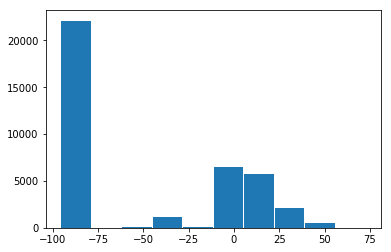

In [199]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

# Generate random data
#mu, sigma = 200, 25
#x = mu + sigma*np.random.randn(10000)

# Create the histogram and normalize the counts to 1
#hist, bins = np.histogram(x, bins = 10)
#print(hist, bins)

max_val = max(hist)
#hist = [ float(n)/max_val for n in hist]

# Plot the resulting histogram
bins= array(bins)
center = (bins[:-1]+bins[1:])/2
width = 0.97*(bins[1]-bins[0])
print("bins",bins)
print("hist",hist)
print("center",center)

plt.bar(bins[:-1], hist, width = width)
plt.show()

In [166]:
df.withColumn('ccol', F.col("reclat").groupBy("reclat").agg(F.count("reclat"))).show()

TypeError: 'Column' object is not callable

In [104]:
from pyspark.sql.functions import when
c= [F.col("df")>2,1]

a = when(F.col("df")>1,0).when(F.col("df")>2,1)
d =a = when(*c).when(*c)

print("d",d)
e = [when(F.col("df")>1,0), when(F.col("df")>2,1)]

print("e",*e)



d Column<b'CASE WHEN (df > 2) THEN 1 WHEN (df > 2) THEN 1 END'>
e Column<b'CASE WHEN (df > 1) THEN 0 END'> Column<b'CASE WHEN (df > 2) THEN 1 END'>


In [22]:
Profiler.run(df, ["escuelas_cercanas", "preciorenta"])

cast function took 11.025 ms
cast function took 14.996 ms
cast function took 12.001 ms
cast function took 11.006 ms
cast function took 10.972 ms
cast function took 12.004 ms
cast function took 9.974 ms
count_na function took 2929.300 ms
[Row(escuelas_cercanas_type='bool', count=21), Row(escuelas_cercanas_type='string', count=3), Row(escuelas_cercanas_type='null', count=76)]
[Row(preciorenta_type='float', count=100)]
count_na function took 1136.515 ms
count_na function took 1177.252 ms
min function took 1145.952 ms
max function took 1126.072 ms
drop_na function took 32.968 ms
cast function took 15.003 ms
percentile function took 238.297 ms
std function took 1152.180 ms
kurt function took 1159.982 ms
mean function took 1136.173 ms
drop_na function took 18.874 ms
cast function took 17.945 ms
median function took 122.641 ms
drop_na function took 4.009 ms
cast function took 5.991 ms
median function took 96.741 ms
mad function took 271.288 ms
skewness function took 1142.970 ms
sum function t

Number of columns,89
Number of rows,100
Total Missing (%),66.51%
Total size in memory,12.6MiB
Categorical,0
Numeric,1
Date,0
Bool,1
Not available,0
Distinct count,3
Unique (%),3.0


In [42]:
df.dtypes
columns= ["acceso_discapacitados"]
list(filter(lambda x:x[0] in columns, df.dtypes))

[('acceso_discapacitados', 'string')]

In [56]:
df.cols().hist("m2_superficie_construida")

cast function took 30.200 ms


[{'bucket_m2_superficie_construida': None,
  'count_m2_superficie_construida': 0,
  'max_m2_superficie_construida': None,
  'min_m2_superficie_construida': None},
 {'bucket_m2_superficie_construida': 0.0,
  'count_m2_superficie_construida': 5,
  'max_m2_superficie_construida': 49.0,
  'min_m2_superficie_construida': 20.0},
 {'bucket_m2_superficie_construida': 1.0,
  'count_m2_superficie_construida': 5,
  'max_m2_superficie_construida': 55.0,
  'min_m2_superficie_construida': 51.0},
 {'bucket_m2_superficie_construida': 2.0,
  'count_m2_superficie_construida': 11,
  'max_m2_superficie_construida': 82.0,
  'min_m2_superficie_construida': 61.0},
 {'bucket_m2_superficie_construida': 3.0,
  'count_m2_superficie_construida': 6,
  'max_m2_superficie_construida': 102.0,
  'min_m2_superficie_construida': 85.0},
 {'bucket_m2_superficie_construida': 4.0,
  'count_m2_superficie_construida': 7,
  'max_m2_superficie_construida': 150.0,
  'min_m2_superficie_construida': 104.0},
 {'bucket_m2_superficie

In [43]:
df.select('m2_superficie_construida').rdd.flatMap(lambda x: x).histogram(10)

([20,
  180018,
  360016,
  540014,
  720012,
  900010,
  1080008,
  1260006,
  1440004,
  1620002,
  1800000],
 [69, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [53]:
from pyspark.sql import functions as F
import pyspark.sql as SQL
win = SQL.Window.partitionBy('m2_superficie_construida')
print(win)
df.select(F.count('m2_superficie_construida').over(win).alias('histogram')).show()

+---------+
|histogram|
+---------+
|        1|
|        1|
|        1|
|        1|
|        1|
|        1|
|        1|
|        1|
|        1|
|        1|
|        1|
|        1|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
+---------+
only showing top 20 rows



In [14]:
from optimus.functions import abstract_udf as audf 

def func(val, attr):
    return val+1

df.select(audf ("m2_superficie_construida", func, "int"), audf ("m2_superficie_total", func, "int")).show()

Using 'Pandas UDF' to process column 'm2_superficie_construida'
Using 'Pandas UDF' to process column 'm2_superficie_total'
+----------------------------------+-----------------------------+
|to_serie(m2_superficie_construida)|to_serie(m2_superficie_total)|
+----------------------------------+-----------------------------+
|                              null|                         9001|
|                                66|                           66|
|                               244|                          366|
|                              null|                          508|
|                              1347|                         1961|
|                              null|                      1500001|
|                               181|                          212|
|                               411|                          696|
|                              null|                          452|
|                           1800001|                      1800001|
|     

In [14]:
from pyspark.ml.feature import Bucketizer
df = op.spark.createDataFrame([(0.1,), (0.4,), (1.2,), (1.5,)], ["values"])
# bucketizer = Bucketizer(splits=[-float("inf"), 0.5, 1.4, float("inf")],inputCol="values", outputCol="buckets")
bucketizer = Bucketizer.setInputCols("asdf")


AttributeError: type object 'Bucketizer' has no attribute 'setInputCols'